In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Test importing Data w/ pandas

In [37]:
breast_incidence = pd.read_csv('BreastIncidence00-15reshape.csv')
breast_incidence.head()

,State,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,CA,Alameda County,66.97291,62.60701,69.83078,61.47867,63.35939,64.09789,70.12885,69.65649,71.62160,67.53244,64.21551,66.18717,68.91489,73.04459,69.42770,67.73860
1,CA,Alpine County,0.00000,0.00000,80.84074,162.20600,0.00000,82.03445,78.36991,0.00000,0.00000,167.08438,0.00000,180.34265,0.00000,262.92726,90.57971,0.00000
2,CA,Amador County,82.49652,81.23932,131.28744,113.53192,101.60428,99.89485,62.57659,87.72835,122.88224,122.91438,105.62729,119.92325,126.72221,106.62730,81.65709,102.63058
3,CA,Butte County,93.22545,74.20233,90.85692,71.40121,76.50248,75.43585,82.55544,83.23025,80.35282,104.19653,89.09779,93.64190,80.47744,80.13831,83.04535,81.24270
4,CA,Calaveras County,113.17505,92.00077,92.02454,89.13267,110.03818,88.30997,115.10479,92.93680,84.29698,82.78867,103.38305,90.89700,80.42895,71.78590,71.76658,98.12667


In [13]:
breast_incidence.shape

(613, 18)

In [38]:
bi_no_zero = breast_incidence[~(breast_incidence == 0).any(axis=1)]
breast_incidence_counties = bi_no_zero.loc[:, 'State':'County']
breast_incidence_trim = bi_no_zero.loc[:, '2000':]
breast_incidence_trim.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,66.97291,62.60701,69.83078,61.47867,63.35939,64.09789,70.12885,69.65649,71.62160,67.53244,64.21551,66.18717,68.91489,73.04459,69.42770,67.73860
2,82.49652,81.23932,131.28744,113.53192,101.60428,99.89485,62.57659,87.72835,122.88224,122.91438,105.62729,119.92325,126.72221,106.62730,81.65709,102.63058
3,93.22545,74.20233,90.85692,71.40121,76.50248,75.43585,82.55544,83.23025,80.35282,104.19653,89.09779,93.64190,80.47744,80.13831,83.04535,81.24270
4,113.17505,92.00077,92.02454,89.13267,110.03818,88.30997,115.10479,92.93680,84.29698,82.78867,103.38305,90.89700,80.42895,71.78590,71.76658,98.12667
5,58.45778,26.28535,57.19634,71.54538,24.74390,82.76534,19.14792,52.19454,33.12198,65.88235,74.60599,23.40167,65.65680,46.89992,28.22732,75.05395


In [24]:
breast_incidence_counties.head()

,State,County
0,CA,Alameda County
2,CA,Amador County
3,CA,Butte County
4,CA,Calaveras County
5,CA,Colusa County


In [9]:
breast_incidence_trim.shape

(579, 18)

# Testing KMeans from SciKit Learn

Raw Data shape: (613, 18)
Trimmed Data shape: (579, 18)


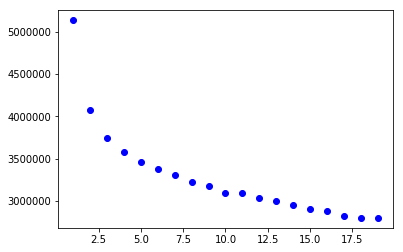

In [69]:
# Breast Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('BreastIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
breast_data_labels = raw_data_no_zero.loc[:, 'State':'County']
breast_data_trim = raw_data_no_zero.loc[:, '2000':]
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(breast_data_trim)
    bi_score = kmeans.score(breast_data_trim)
    scores.append(abs(bi_score))
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (175, 18)


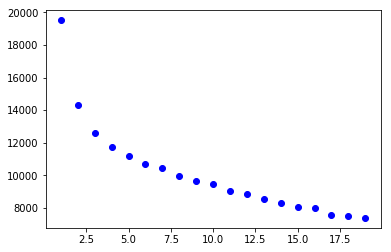

In [63]:
# Esophagus Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('EsophagusIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
esophagus_data_labels = raw_data_no_zero.loc[:, 'State':'County']
esophagus_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(esophagus_data_trim)
    bi_score = kmeans.score(esophagus_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (188, 18)


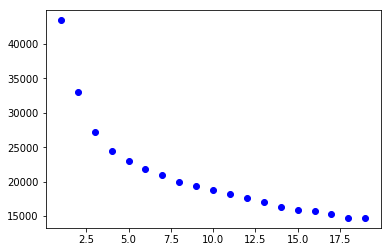

In [64]:
# Liver and Bile Duct Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('LiverAndBileDuctIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
liver_data_labels = raw_data_no_zero.loc[:, 'State':'County']
liver_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(liver_data_trim)
    bi_score = kmeans.score(liver_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (587, 18)


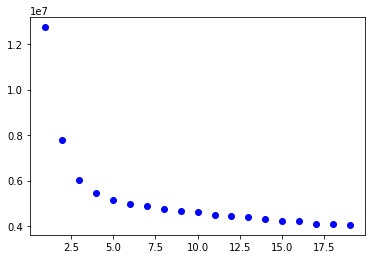

In [65]:
# Lung and Bronchus Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('LungAndBronchusIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
lung_data_labels = raw_data_no_zero.loc[:, 'State':'County']
lung_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(lung_data_trim)
    bi_score = kmeans.score(lung_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (405, 18)


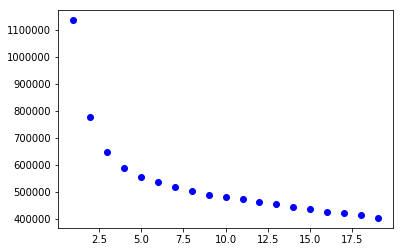

In [66]:
# Melanomas Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('MelanomasIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
melanomas_data_labels = raw_data_no_zero.loc[:, 'State':'County']
melanomas_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(melanomas_data_trim)
    bi_score = kmeans.score(melanomas_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (317, 18)


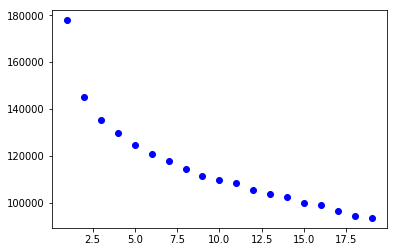

In [67]:
# Pancrease Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('PancreaseIncidence00-15reshape.csv')
# remove rows with 0 values
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
pancrease_data_labels = raw_data_no_zero.loc[:, 'State':'County']
pancrease_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(pancrease_data_trim)
    bi_score = kmeans.score(pancrease_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

Raw Data shape: (613, 18)
Trimmed Data shape: (437, 18)


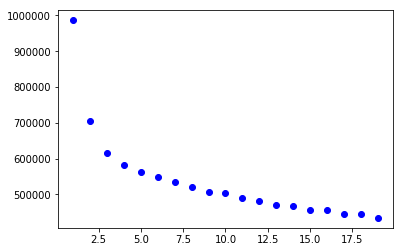

In [68]:
# Urinary Bladder Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('UrinaryBladderIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
urinary_data_labels = raw_data_no_zero.loc[:, 'State':'County']
urinary_data_trim = raw_data_no_zero.loc[:, '2000':]

# cluster the data with scikit learn k-means
n = 20  # number of clusters
scores = []
for c in range(1, n):
    kmeans = KMeans(n_clusters = c)
    kmeans = kmeans.fit(urinary_data_trim)
    bi_score = kmeans.score(urinary_data_trim)
    scores.append(abs(bi_score))
# plot cost vs number of clusters
plt.plot([i for i in range(1, n)], scores, 'bo')

# Testing DBScan: NOT WORKING!!!!

In [ ]:
# Breast Incidence 2000 - 2015
# load the data into a pandas dataframe
raw_data = pd.read_csv('BreastIncidence00-15reshape.csv')
print("Raw Data shape: {}".format(raw_data.shape))
# remove rows with 0 values
raw_data_no_zero = raw_data[~(raw_data == 0).any(axis=1)]
print("Trimmed Data shape: {}".format(raw_data_no_zero.shape))
# slice the data into state-county labels and yearly data
breast_data_labels = raw_data_no_zero.loc[:, 'State':'County']
breast_data_trim = raw_data_no_zero.loc[:, '2000':]
n = 20  # number of clusters
scores = []
for c in range(1, n):
    db = DBSCAN(eps=0.3, min_samples=10)
    db = db.fit(breast_data_trim)
    bi_score = db.score(breast_data_trim)
    scores.append(abs(bi_score))
plt.plot([i for i in range(1, n)], scores, 'bo')